<a href="https://colab.research.google.com/github/Shirley31415926/API_heatwave/blob/main/Posts_vs_temperature_with_lag_and_forecast_effect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install --upgrade atproto
!pip install pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.4/380.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.4/682.4 kB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 11.8 MB/s eta 0:00:00
  Attempting uninstall: websockets
    Found existing installation: websockets 15.0.1
    Uninstalling websockets-15.0.1:
      Successfully uninstalled websockets-15.0.1


In [18]:
from atproto import Client
client = Client()

# plz replace these with your bluesky account and password if you wanna run the following code
client.login('user_name.bsky.social','your_password')

UnauthorizedError: Response(success=False, status_code=401, content=XrpcError(error='AuthenticationRequired', message='Invalid identifier or password'), headers={'date': 'Thu, 24 Apr 2025 00:15:03 GMT', 'content-type': 'application/json; charset=utf-8', 'content-length': '77', 'connection': 'keep-alive', 'x-powered-by': 'Express', 'access-control-allow-origin': '*', 'ratelimit-limit': '10', 'ratelimit-remaining': '8', 'ratelimit-reset': '1745538219', 'ratelimit-policy': '10;w=86400', 'etag': 'W/"4d-98r3hvgolnybv7tgksQiZbSE7Zg"', 'vary': 'Accept-Encoding'})

❗❗❗Heatwave posts scraper ❗❗❗

In [ ]:
import json
import time

# Define the keyword(s) to search for
keyword = ["heatwave"]

# Path to store the output JSONL file (2023 version)
output_file = '/content/drive/MyDrive/heat_posts2023.jsonl'  # Colab path

# Uncomment the following line to switch to 2024 data collection
# output_file = '/content/drive/MyDrive/heat_posts2024.jsonl'  # Colab path

# Configuration for scraping
MAX_PER_DAY = 10000         # Maximum number of posts to retrieve
request_delay = 1           # Delay between API requests (in seconds)
error_delay = 10            # Delay after an error before retrying

# Define the fixed time range for data collection (2023 summer)
since_time = "2023-06-01T00:00:00Z"
until_time = "2023-09-30T23:59:59Z"

# Uncomment these lines to switch the time range to summer 2024
# since_time = "2024-06-01T00:00:00Z"
# until_time = "2024-09-30T23:59:59Z"

def search_and_save(f, base_params, max_results):
    """
    Search posts using the Bluesky API and save results to a file.
    - Avoids duplicate posts using a set of seen URIs.
    - Handles pagination using cursors.
    - Retries on error with a delay.
    """
    total_saved = 0
    cursor = None
    seen_uris = set()  # Used to avoid saving duplicate posts

    while total_saved < max_results:
        params = base_params.copy()
        if cursor:
            params['cursor'] = cursor  # Set cursor for pagination

        try:
            # Perform API request
            response = client.app.bsky.feed.search_posts(params)
            if not response.posts:
                print(f"No more results [{params['q']}]")
                break

            new_posts = 0
            for post in response.posts:
                if post.uri in seen_uris:
                    continue  # Skip already seen posts

                seen_uris.add(post.uri)
                post_data = {
                    "uri": post.uri,
                    "text": post.record.text,
                    "created_at": post.record.created_at,
                    "author": post.author.did,
                    "search_query": base_params['q']
                }
                f.write(json.dumps(post_data) + '\n')
                total_saved += 1
                new_posts += 1

                # Display brief preview of post
                print(f"[{post.record.created_at}] {post.record.text[:50]}...")

            # Stop if no new posts were added
            if new_posts == 0:
                print("No new data retrieved, terminating pagination")
                break

            # Prepare next page
            cursor = response.cursor
            if not cursor:
                break

            time.sleep(request_delay)

        except Exception as e:
            print(f"Search error: {str(e)}")
            time.sleep(error_delay)

    return total_saved

# Main script execution
total_saved = 0
with open(output_file, 'w', encoding='utf-8') as f:
    print(f"Searching for posts from {since_time} to {until_time}...\n")

    for limitation in keyword:
        print(f"\nSearching for keyword: {limitation}")

        base_params = {
            'q': f"{limitation}",
            'since': since_time,
            'until': until_time,
            'limit': 100,
            'lang': 'en',
            'sort': 'latest'
        }

        count = search_and_save(f, base_params, MAX_PER_DAY)
        total_saved += count

        print(f"Keyword '{limitation}' fetched posts: {count}/{MAX_PER_DAY}")

print(f"\nData collection complete, total fetched {total_saved} posts, saved to: {output_file}")

Searching for posts from 2023-06-01T00:00:00Z to 2023-09-30T23:59:59Z...


Searching for keyword: heatwave
[2023-09-30T22:13:48.281Z] Love that Legacy is FINALLY giving us a new Chase ...
[2023-09-30T19:14:46.674Z] every fucking time i move it’s this florida ass we...
[2023-09-30T14:56:43.043Z] I am completely flattened by hot weather. Managed ...
[2023-09-30T10:26:51.629Z] We're having a mini heatwave in Porto. Already war...
[2023-09-30T07:52:51.724Z] late night heatwave...
[2023-09-29T21:28:56.508Z] A heatwave is passing through Iowa and it’s almost...
[2023-09-29T21:01:28.620Z] Hey look. I wrote this October’s story of the mont...
[2023-09-29T17:07:55.560Z] my favorite phd study is here! 🧪Resilience to heat...
[2023-09-29T16:42:09.720Z] I can't help but blame the heatwave for this~ 

ar...
[2023-09-29T08:10:30.030Z] Reposting from the Bad Place.

Occidental culture ...
[2023-09-29T06:27:46.829Z] Yup, frustrating. Yet another thing. Ugh.

I was d...
[2023-09-28T22:38:01.765Z] Suppor

Post Count vs. Temperature

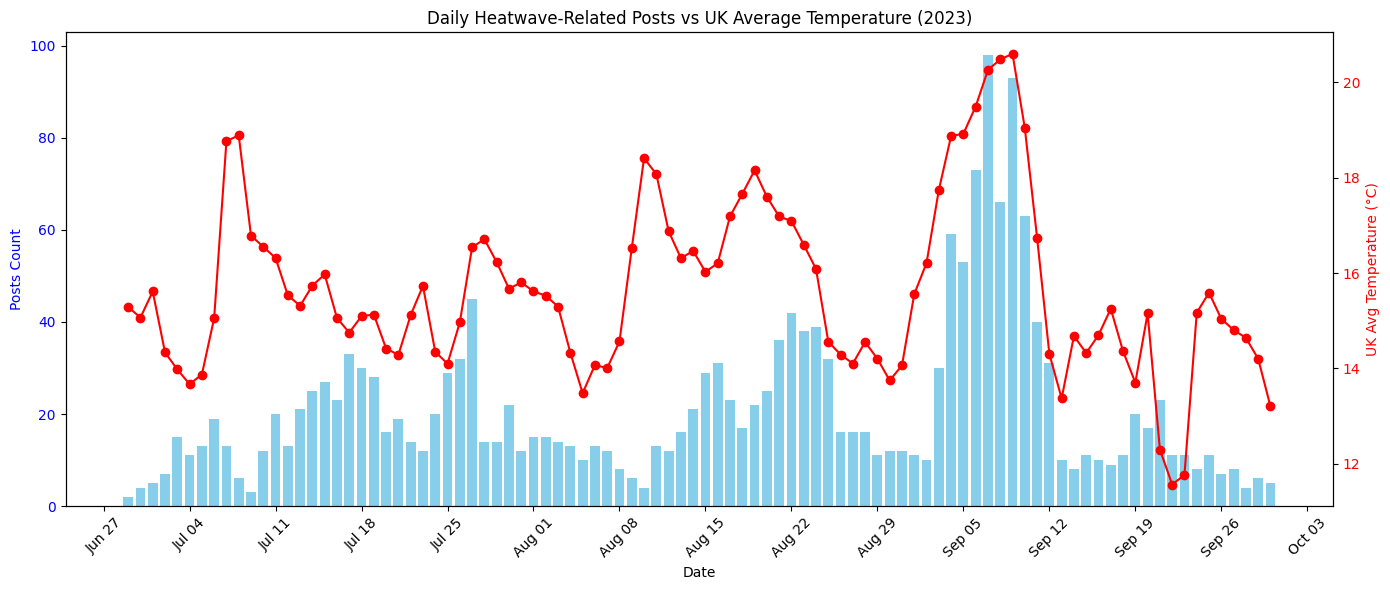

In [ ]:
import matplotlib.dates as mdates

# Ensure the 'date' column is in datetime format
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Set up the plot canvas
fig, ax1 = plt.subplots(figsize=(14,6))

# Left y-axis bar chart: Number of posts
ax1.bar(merged_df['date'], merged_df['post_count'], color='skyblue', label='Posts Count')
ax1.set_ylabel('Posts Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('Date')

# Format the X-axis (to make it look nicer)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=45)

# Right y-axis line chart: Average temperature
ax2 = ax1.twinx()
ax2.plot(merged_df['date'], merged_df['avg_temp'], color='red', marker='o', label='Avg Temp (°C)')
ax2.set_ylabel('UK Avg Temperature (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title
plt.title('Daily Heatwave-Related Posts vs UK Average Temperature (2023)')
fig.tight_layout()
plt.show()

In [ ]:
import statsmodels.api as sm

# Step 1: Define independent and dependent variables
X = merged_df[['avg_temp']]      # Independent variable (UK average temperature)
X = sm.add_constant(X)           # Add a constant term (β₀)
y = merged_df['post_count']      # Dependent variable (number of posts)

# Step 2: Fit the model
model = sm.OLS(y, X).fit()

# Step 3: Output the regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             post_count   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     56.71
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           3.37e-11
Time:                        00:06:39   Log-Likelihood:                -381.72
No. Observations:                  94   AIC:                             767.4
Df Residuals:                      92   BIC:                             772.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -74.2976     12.754     -5.825      0.0

# Lag effect vs. Posts (Lead Analysis)

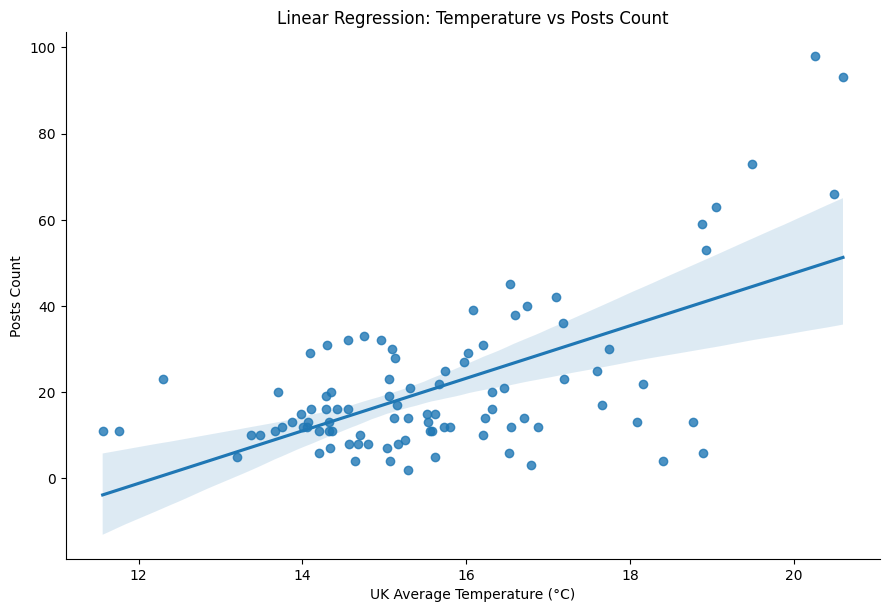

In [ ]:
import seaborn as sns

sns.lmplot(x='avg_temp', y='post_count', data=merged_df, height=6, aspect=1.5, ci=95)
plt.xlabel('UK Average Temperature (°C)')
plt.ylabel('Posts Count')
plt.title('Linear Regression: Temperature vs Posts Count')
plt.show()


In [ ]:
for lag in range(1, 4):
    merged_df[f'avg_temp_lag{lag}'] = merged_df['avg_temp'].shift(lag)

X = merged_df[['avg_temp', 'avg_temp_lag1', 'avg_temp_lag2']].dropna()
X = sm.add_constant(X)
y = merged_df.loc[X.index, 'post_count']

lag_model = sm.OLS(y, X).fit()
print(lag_model.summary())


                            OLS Regression Results                            
Dep. Variable:             post_count   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     28.15
Date:                Mon, 21 Apr 2025   Prob (F-statistic):           7.45e-13
Time:                        19:26:48   Log-Likelihood:                -365.50
No. Observations:                  92   AIC:                             739.0
Df Residuals:                      88   BIC:                             749.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -101.7282     13.527     -7.520

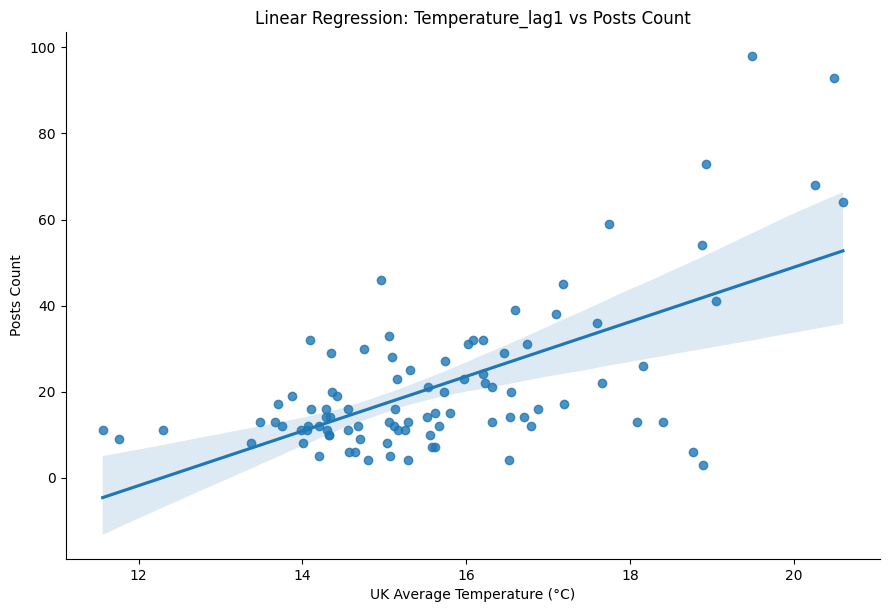

In [ ]:
import seaborn as sns

sns.lmplot(x='avg_temp_lag1', y='post_count', data=merged_df, height=6, aspect=1.5, ci=95)
plt.xlabel('UK Average Temperature (°C)')
plt.ylabel('Posts Count')
plt.title('Linear Regression: Temperature_lag1 vs Posts Count')
plt.show()


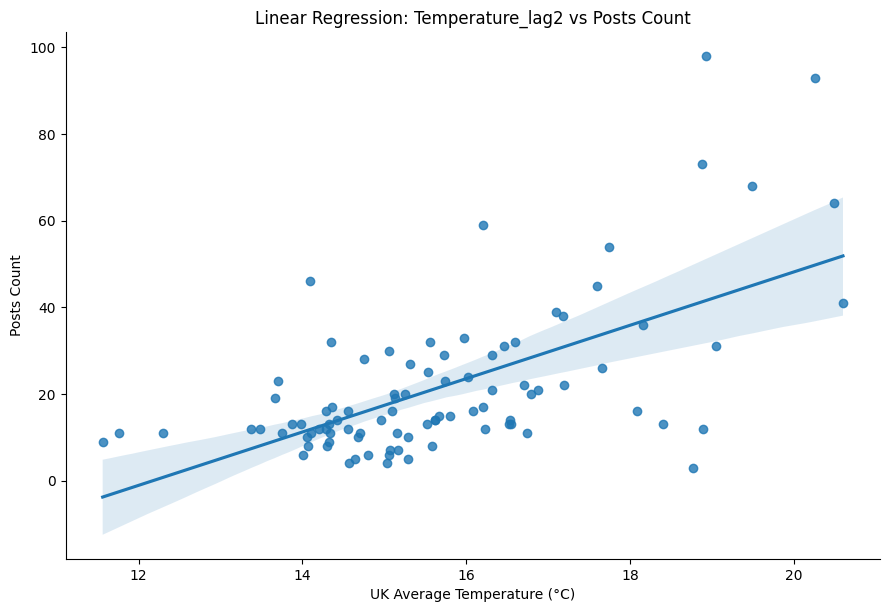

In [ ]:
import seaborn as sns

sns.lmplot(x='avg_temp_lag2', y='post_count', data=merged_df, height=6, aspect=1.5, ci=95)
plt.xlabel('UK Average Temperature (°C)')
plt.ylabel('Posts Count')
plt.title('Linear Regression: Temperature_lag2 vs Posts Count')
plt.show()


# Forecast vs. Posts


In [ ]:
import statsmodels.api as sm

# Add lead features (temperature of the next 1 and 2 days)
merged_df['avg_temp_lead1'] = merged_df['avg_temp'].shift(-1)
merged_df['avg_temp_lead2'] = merged_df['avg_temp'].shift(-2)

# Prepare data (remove rows with NaN at the end caused by shift)
df_pred = merged_df.dropna(subset=['avg_temp', 'avg_temp_lead1', 'avg_temp_lead2'])

X = df_pred[['avg_temp', 'avg_temp_lead1', 'avg_temp_lead2']]
X = sm.add_constant(X)

y = df_pred['post_count']

model_pred = sm.OLS(y, X).fit()

print(model_pred.summary())



                            OLS Regression Results                            
Dep. Variable:             post_count   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     18.15
Date:                Mon, 21 Apr 2025   Prob (F-statistic):           2.96e-09
Time:                        19:55:58   Log-Likelihood:                -374.56
No. Observations:                  92   AIC:                             757.1
Df Residuals:                      88   BIC:                             767.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -80.6054     14.926     -5.

We further explored the predictive power of "forecasted future temperatures" on posting behavior. The results show that the same-day temperature remains the primary driver of post volume changes (β = 5.84, p < 0.01), while forecasted temperatures for the next day and the day after did not have a statistically significant impact on posting behavior. This suggests that the public tends to react in real-time to extreme weather, rather than posting in advance based on forecast information.